In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

2024-08-30 09:37:14.241357: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-30 09:37:14.379082: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-30 09:37:14.412255: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-30 09:37:15.121928: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
np.random.seed(42)


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equat to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equat to number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimension is not 28*28"
assert(X_test.shape[1:] == (28,28)), "The dimension is not 28*28"

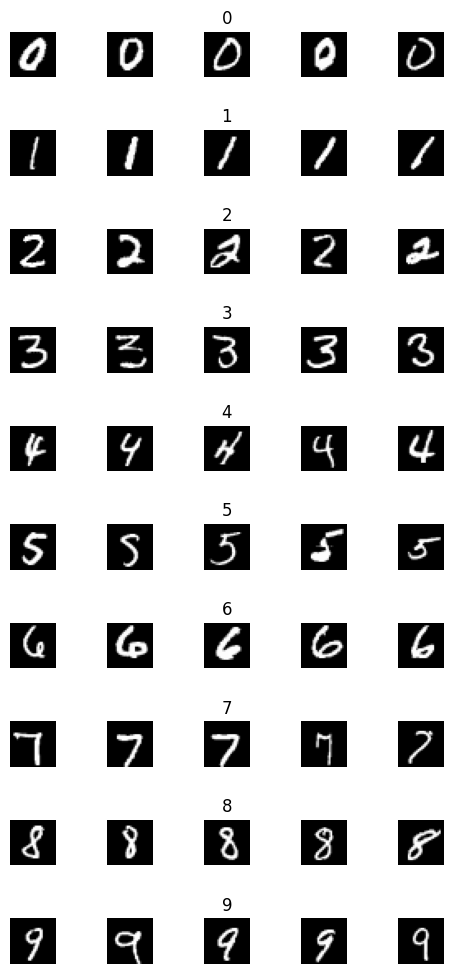

In [6]:
no_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            no_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'No of images')

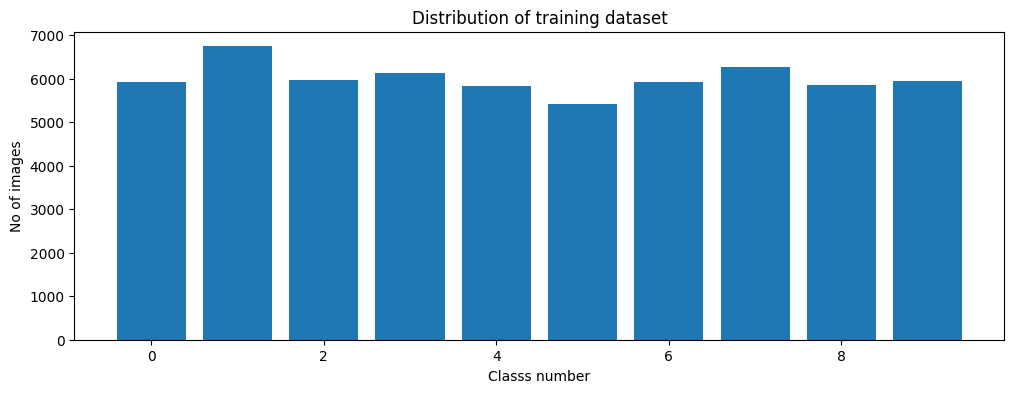

In [7]:
print(no_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), no_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Classs number")
plt.ylabel("No of images")

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)


In [11]:
def create_mode():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(10, activation="relu"))

    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
model = create_mode()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________
None


2024-08-30 09:37:19.157781: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-30 09:37:19.383100: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-30 09:37:19.383279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-30 09:37:19.383729: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [13]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/20
 10/270 [>.............................] - ETA: 1s - loss: 2.2947 - accuracy: 0.0875  

2024-08-30 09:37:20.782581: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


270/270 [==============================] - 4s 11ms/step - loss: 1.3468 - accuracy: 0.5446 - val_loss: 0.5310 - val_accuracy: 0.8612
Epoch 2/20
270/270 [==============================] - 3s 11ms/step - loss: 0.4947 - accuracy: 0.8599 - val_loss: 0.3699 - val_accuracy: 0.8977
Epoch 3/20
270/270 [==============================] - 3s 10ms/step - loss: 0.4044 - accuracy: 0.8851 - val_loss: 0.3210 - val_accuracy: 0.9103
Epoch 4/20
270/270 [==============================] - 3s 10ms/step - loss: 0.3652 - accuracy: 0.8957 - val_loss: 0.2983 - val_accuracy: 0.9187
Epoch 5/20
270/270 [==============================] - 3s 10ms/step - loss: 0.3402 - accuracy: 0.9034 - val_loss: 0.2807 - val_accuracy: 0.9243
Epoch 6/20
270/270 [==============================] - 3s 10ms/step - loss: 0.3224 - accuracy: 0.9084 - val_loss: 0.2630 - val_accuracy: 0.9250
Epoch 7/20
270/270 [==============================] - 3s 10ms/step - loss: 0.2918 - accuracy: 0.9170 - val_loss: 0.2320 - val_accuracy: 0.9317
Epoch 8/20

Text(0.5, 0, 'epochs')

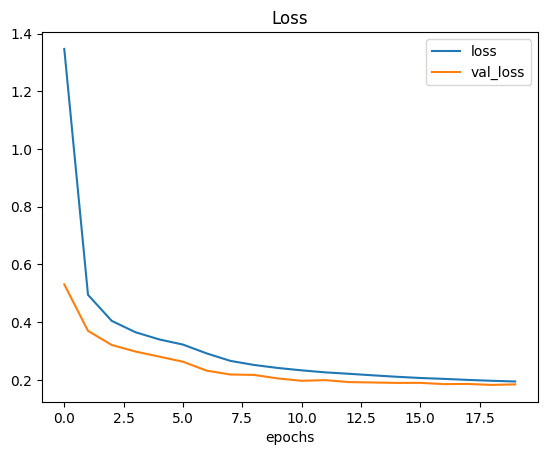

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

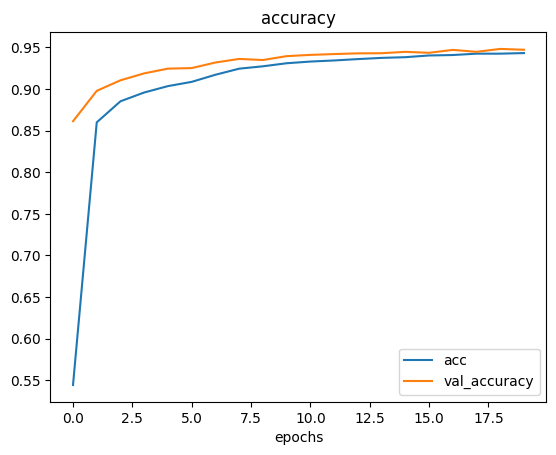

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

In [16]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.22997908294200897
Test accuracy: 0.9355999827384949


<Response [200]>


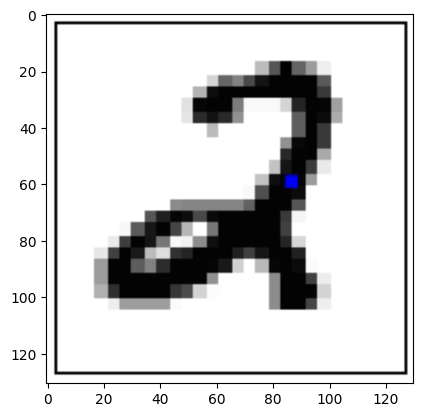

In [17]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

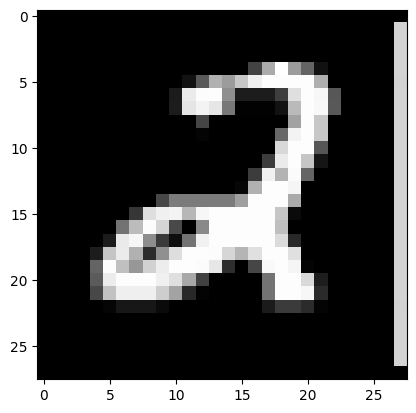

In [18]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [19]:
image = image / 255
image = image.reshape(1, 784)
print(image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.82352941 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.82352941
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.      

In [20]:
prediction = model.predict(image)
predicted_class = np.argmax(prediction, axis=1)
print("predicted digits:", str(predicted_class))

1/1 [==============================] - 0s 101ms/step
predicted digits: [2]
